**Task_2**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

Відобразимо датасет petrol_consumption.csv, який даний нам для виконання домашнього завдання:

In [2]:
data2 = pd.read_csv('C:/Users/Vitalii/Downloads/Telegram Desktop/petrol_consumption.csv')
data2

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [3]:
data2.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


Побудуємо модель множинної регресії:

In [4]:
X = data2.drop(columns = 'Petrol_Consumption')
y = data2['Petrol_Consumption'].values

In [1]:
X

NameError: name 'X' is not defined

In [5]:
X,y

(array([[9.0000e+00, 3.5710e+03, 1.9760e+03, 5.2500e-01],
        [9.0000e+00, 4.0920e+03, 1.2500e+03, 5.7200e-01],
        [9.0000e+00, 3.8650e+03, 1.5860e+03, 5.8000e-01],
        [7.5000e+00, 4.8700e+03, 2.3510e+03, 5.2900e-01],
        [8.0000e+00, 4.3990e+03, 4.3100e+02, 5.4400e-01],
        [1.0000e+01, 5.3420e+03, 1.3330e+03, 5.7100e-01],
        [8.0000e+00, 5.3190e+03, 1.1868e+04, 4.5100e-01],
        [8.0000e+00, 5.1260e+03, 2.1380e+03, 5.5300e-01],
        [8.0000e+00, 4.4470e+03, 8.5770e+03, 5.2900e-01],
        [7.0000e+00, 4.5120e+03, 8.5070e+03, 5.5200e-01],
        [8.0000e+00, 4.3910e+03, 5.9390e+03, 5.3000e-01],
        [7.5000e+00, 5.1260e+03, 1.4186e+04, 5.2500e-01],
        [7.0000e+00, 4.8170e+03, 6.9300e+03, 5.7400e-01],
        [7.0000e+00, 4.2070e+03, 6.5800e+03, 5.4500e-01],
        [7.0000e+00, 4.3320e+03, 8.1590e+03, 6.0800e-01],
        [7.0000e+00, 4.3180e+03, 1.0340e+04, 5.8600e-01],
        [7.0000e+00, 4.2060e+03, 8.5080e+03, 5.7200e-01],
        [7.000

In [6]:
model = LinearRegression()

In [7]:
model.fit(X, y)

LinearRegression()

In [11]:
model.score(X, y)

0.6786867115698209

In [14]:
print(f"intercept: {model.intercept_}")

intercept: 377.2911464736734


In [15]:
print(f"coefficients: {model.coef_}")

coefficients: [-3.47901492e+01 -6.65887518e-02 -2.42588889e-03  1.33644936e+03]


In [16]:
y_pred = model.predict(X)

In [17]:
print(f"predicted response:\n{y_pred}")

predicted response:
[523.23372749 553.11530293 578.10744578 493.35625176 532.02892629
 433.55141589 318.73259324 491.50595563 489.02463498 550.39466272
 500.48954932 442.25333892 563.31260606 566.0237744  638.06601138
 604.30550439 597.49738202 596.40345112 772.9677508  682.70972973
 694.9794757  570.24033097 415.07930617 460.22150127 507.02812076
 531.91824029 588.64881068 612.08788703 558.02256272 471.98285862
 566.90705013 581.42200158 651.64983584 613.86729832 506.41719219
 716.82376287 647.28207972 641.93375943 717.64832948 733.05284779
 662.87034473 633.06544672 644.48932597 556.96750449 713.79948278
 519.67828001 670.3978699  569.438479  ]


Побудуємо графік:

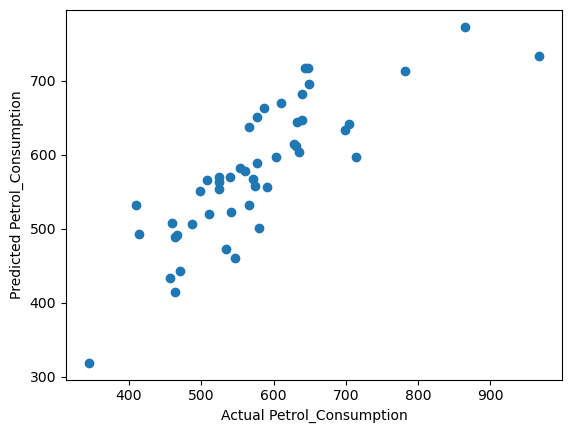

In [25]:

plt.scatter(y, y_pred)
plt.xlabel('Actual Petrol_Consumption')
plt.ylabel('Predicted Petrol_Consumption')
plt.show()

Відобразимо коефіцієнт детермінації $R^2$, що відображає певну оцінку якості тренування:

0.7200910546264263

**Оцінка якості множинної регресії:**

In [37]:
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)

In [38]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 51.28
Mean squared error: 4228.51
Root mean squared error: 65.03
